## Analizando el dataset

In [2]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import cv2
import numpy as np

## To-do:
* Eliminar elementos repetidos de todo el dataset

In [31]:
dataset = R"D:\Documents\Trabajo terminal\TT2\Modelo\Datasets\Apparel-images-dataset"

#Retorna diccionario con nombre de clase: numero de items y tamaño del dataset
def initialExam(dataSetPath):
    classes = os.listdir(dataset)
    classes_values = {} #Diccionario para guardar el nombre de la clase y su número de items

    ct = 0
    for classe in classes:
        classe_path = os.path.join(dataset,classe) #Ruta completa de la subcarpeta
        if os.path.isdir(classe_path):
            num_images = len(os.listdir(classe_path))
            #print(f"La clase {classe} contiene {num_images} imagenes")
            classes_values[str(classe)] = num_images
            ct += num_images
    
    return classes_values, ct

In [29]:
examen_inicial, tamanio = initialExam(dataset)
num_classes = len(examen_inicial)
print("Tamaño del dataset: " + str(tamanio))
print("Numero de clases: " + str(num_classes))

Tamaño del dataset: 11385
Numero de clases: 24


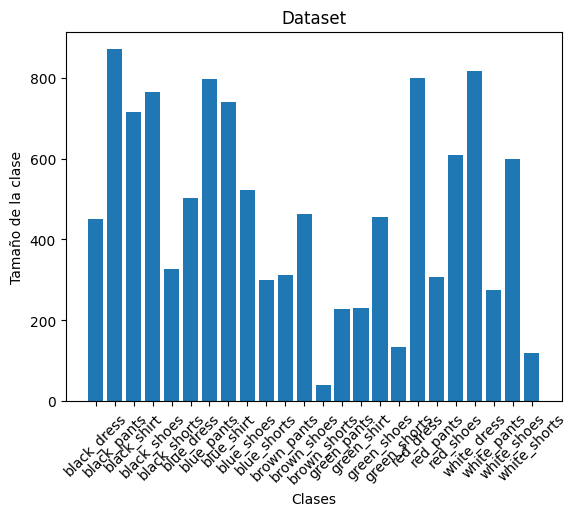

In [28]:
#Crear grafica de barras
#plt.bar(classe_names,num_images)
classe_names = list(examen_inicial.keys())
num_images = list(examen_inicial.values())
plt.bar(classe_names, num_images)
plt.xlabel("Clases")
plt.ylabel("Tamaño de la clase")
plt.title("Dataset")
plt.xticks(rotation=45)

#Mostrar la grafica
plt.show()

### Mostrando algunas imágenes de cada clase

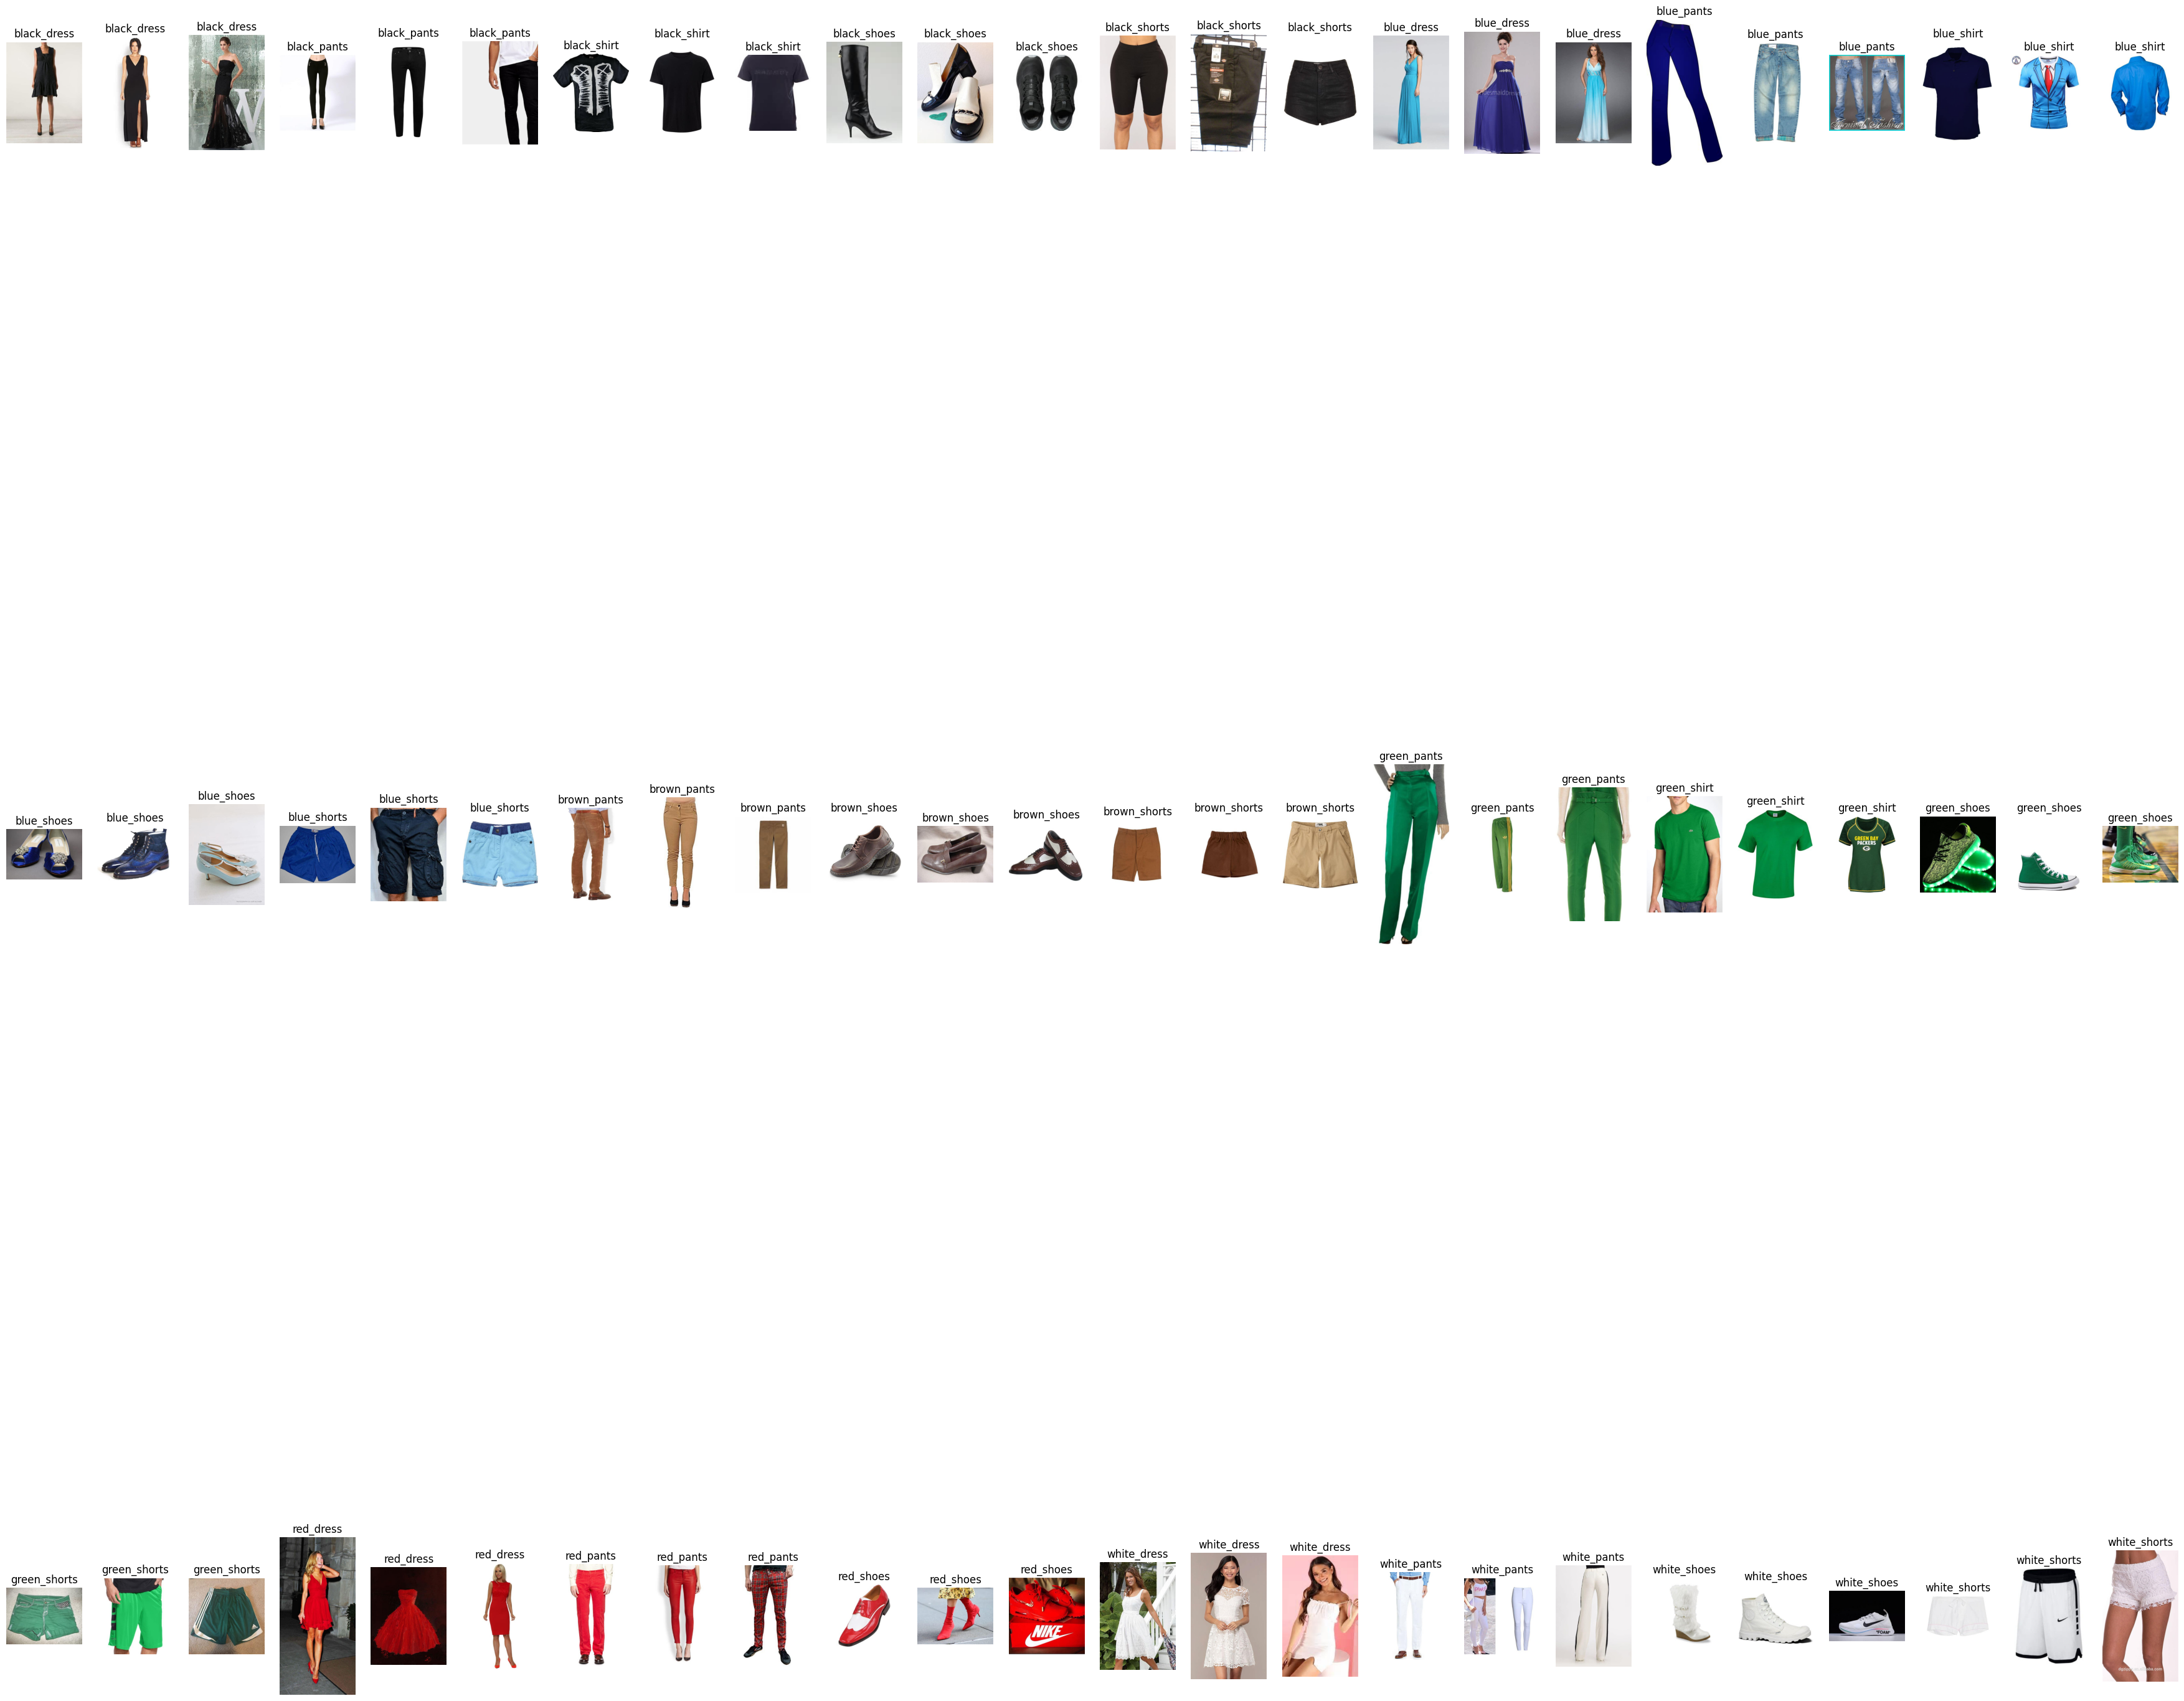

In [30]:
num_samples = 3 # numero de muestras por cada clase

plt.figure(figsize=(45, 45))

for i, class_name in enumerate(examen_inicial.keys()):
    class_dir = os.path.join(dataset,class_name)
    sample_images = random.sample(os.listdir(class_dir), num_samples)
    

    for j, image_filename in enumerate(sample_images):
        image_path = os.path.join(class_dir, image_filename)
        image = Image.open(image_path)
        plt.subplot(num_samples, num_classes, i * num_samples + j + 1)
        plt.imshow(image)
        plt.axis("off")
        plt.title(class_name)

### Calculando la media y desviación estándar

In [11]:
dataset = R"D:\Documents\Trabajo terminal\TT2\Modelo\Datasets\Apparel-images-dataset"

# Iterando en todo el dataset
for class_name in os.listdir(dataset):
    class_dir = os.path.join(dataset, class_name)
    #Inicializando valores a usar por cada clase
    total_pixel_values = np.zeros(3)  # canales RGB
    total_pixels = 0
    class_mean = 0
    class_variance = np.zeros(3)

    for image_filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_filename)

        # Cargar una imagen usando OpenCV
        image = cv2.imread(image_path)

        # Convertir de BGR a RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Acumulando los valores de los pixeles
        total_pixel_values += np.sum(image, axis=(0, 1))
        total_pixels += image.shape[0] * image.shape[1]
    class_mean = total_pixel_values / total_pixels
    print("{} {} {} {}".format("Media (R, G, B) ","para ", class_name, class_mean ))

    
    total_pixels = 0
    for image_filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_filename)

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        total_pixels += image.shape[0] * image.shape[1]

        diff = image - class_mean
        class_variance += np.sum(diff ** 2, axis=(0, 1))
    stddev = np.sqrt(class_variance / (total_pixels - 1))
    print("{} {} {} {}".format("Desviacion estandar (R, G, B) ","para ", class_name, stddev ))


Media (R, G, B)  para  black_dress [156.60856712 147.23883727 143.26496966]
Desviacion estandar (R, G, B)  para  black_dress [90.4609234  90.39681062 90.76700609]
Media (R, G, B)  para  black_pants [165.90963396 163.01480118 162.36509682]
Desviacion estandar (R, G, B)  para  black_pants [97.31995299 97.52380888 97.44757029]
Media (R, G, B)  para  black_shirt [133.89711288 131.05371873 130.29097755]
Desviacion estandar (R, G, B)  para  black_shirt [106.19178386 106.05727015 105.46720188]
Media (R, G, B)  para  black_shoes [167.33370154 164.55332955 162.82486583]
Desviacion estandar (R, G, B)  para  black_shoes [95.77162701 96.03849279 96.36039454]
Media (R, G, B)  para  black_shorts [141.83041555 134.5436509  131.89060273]
Desviacion estandar (R, G, B)  para  black_shorts [100.52722586  98.90195503  98.10350564]
Media (R, G, B)  para  blue_dress [150.60657134 150.67840534 162.6241237 ]
Desviacion estandar (R, G, B)  para  blue_dress [87.79069152 80.88037195 71.51197078]
Media (R, G, B) 